Análise de usuários ficticios do serviço de assinatura Prime video

Bibliotecas utilizadas:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from collections import Counter



Código para leitura de arquivo:

In [3]:
df = pd.read_csv('./amazon_prime_users.csv', na_values='na')

Verificação da leitura:

In [4]:
df.head(n=5)

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


Número de linhas e colunas:

In [5]:
df.shape

(2500, 19)

Tipo de informação em cada coluna:

In [6]:
df.dtypes

User ID                            int64
Name                              object
Email Address                     object
Username                          object
Date of Birth                     object
Gender                            object
Location                          object
Membership Start Date             object
Membership End Date               object
Subscription Plan                 object
Payment Information               object
Renewal Status                    object
Usage Frequency                   object
Purchase History                  object
Favorite Genres                   object
Devices Used                      object
Engagement Metrics                object
Feedback/Ratings                 float64
Customer Support Interactions      int64
dtype: object

Exploração de dados
Data exploration

Verificando Dados Faltantes
Checking for Missing Data

In [7]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    dados_faltantes = False
    for col in df.columns:
        if df[col].isna().any():
            dados_faltantes = True
            qtd = df[col].isna().sum()
            total = len(df)
            dict_dados_faltantes = {col: {'Quantidade': qtd, 'Porcentagem': round(100 * qtd / total, 2)}}
            print(dict_dados_faltantes)
    if not dados_faltantes:
        print('Sem dados faltantes')

stats_dados_faltantes(df=df)

Sem dados faltantes


Ocorrência de dispositivos usados
Occurrence of used devices

In [8]:
def contar_ocorrencia_dispositivos(df):
    dispositivos = df['Devices Used'].tolist()

    contador_dispositivos = Counter(dispositivos)

    return contador_dispositivos

ocorrencias_dispositivos = contar_ocorrencia_dispositivos(df)

print("Ocorrência de dispositivos usados:")
for dispositivo, ocorrencias in ocorrencias_dispositivos.items():
    print(f"{dispositivo}: {ocorrencias} vezes")

Ocorrência de dispositivos usados:
Smart TV: 780 vezes
Smartphone: 867 vezes
Tablet: 853 vezes


Porcentagem de tipo de assinatura
Subscription Type Percentage

In [9]:
def calcular_porcentagem_assinaturas(df):
    assinaturas_anuais = df[df['Subscription Plan'] == 'Annual'].shape[0]
    assinaturas_mensais = df[df['Subscription Plan'] == 'Monthly'].shape[0]
    total_usuarios = len(df)

    porcentagem_anuais = (assinaturas_anuais / total_usuarios) * 100
    porcentagem_mensais = (assinaturas_mensais / total_usuarios) * 100

    return porcentagem_anuais, porcentagem_mensais

porcentagem_anuais, porcentagem_mensais = calcular_porcentagem_assinaturas(df)

print(f"Porcentagem de assinaturas anuais: {porcentagem_anuais:.2f}%")
print(f"Porcentagem de assinaturas mensais: {porcentagem_mensais:.2f}%")

Porcentagem de assinaturas anuais: 50.84%
Porcentagem de assinaturas mensais: 49.16%


In [10]:

def calcular_idades(df):

    df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
    
    df['Idade'] = pd.Timestamp.now().year - df['Date of Birth'].dt.year
    
    idade_minima = df['Idade'].min()
    idade_maxima = df['Idade'].max()
    
    return idade_minima, idade_maxima

idade_minima, idade_maxima = calcular_idades(df)

print(f"A idade do usuário mais novo é: {idade_minima} anos.")
print(f"A idade do usuário mais velho é: {idade_maxima} anos.")

A idade do usuário mais novo é: 18 anos.
A idade do usuário mais velho é: 91 anos.


In [11]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

ano_atual = pd.Timestamp.now().year
df['Idade'] = ano_atual - df['Date of Birth'].dt.year

media_idade = round(df['Idade'].mean())
print(f'A média da idade dos usuários é: {media_idade} Anos')

A média da idade dos usuários é: 55 Anos


In [12]:
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'])
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'])

df['Tempo de Assinatura'] = df['Membership End Date'] - df['Membership Start Date']

media_tempo_assinatura = df['Tempo de Assinatura'].mean()
print(f'A média de tempo que os usuários assinam a plataforma é de: {media_tempo_assinatura}')

A média de tempo que os usuários assinam a plataforma é de: 365 days 00:00:00


Visualização de dados
Data visualization

In [13]:
sns.set_style('whitegrid') 

Convertendo a coluna 'Date of Birth' para o formato datetime e utilizando a função 'Timestamp.now().year' para acessar o ano atual e subtrair o ano de nascimento do usuário, obtendo assim sua idade.

Converting the 'Date of Birth' column to datetime format and using the 'Timestamp.now().year' function to access the current year and subtract the user's year of birth, thus obtaining their age.

In [14]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

ano_atual = pd.Timestamp.now().year
df['Idade'] = ano_atual - df['Date of Birth'].dt.year

media_idade = df['Idade'].mean()

Gráfico com a destribuição de idade dos usuários
Graph with the age distribution of users

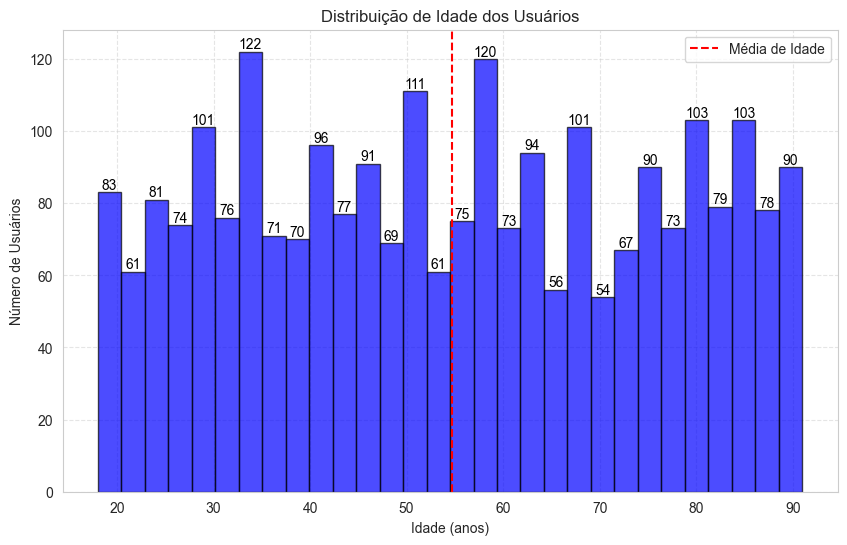

In [15]:
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(df['Idade'], bins=30, alpha=0.7, color='blue', edgecolor='black')  
plt.axvline(media_idade, color='red', linestyle='--', label='Média de Idade')  

for i, bin_count in enumerate(n):
    if bin_count > 0:
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, bin_count, str(int(bin_count)), ha='center', va='bottom', color='black')

plt.title('Distribuição de Idade dos Usuários')
plt.xlabel('Idade (anos)')
plt.ylabel('Número de Usuários')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

Gráfico Tipo de plano de incrição
Chart Type of Subscription Plan

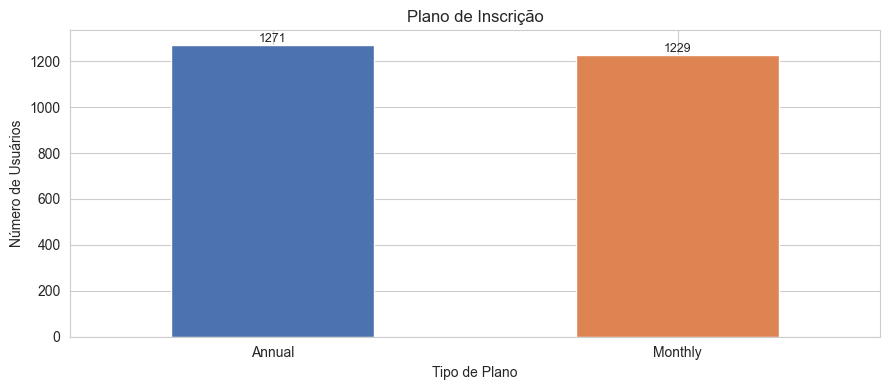

In [16]:
plano_inscricao = df['Subscription Plan'].value_counts()

palette = sns.color_palette("deep", len(plano_inscricao))
plt.figure(figsize=(9, 4))
ax = plano_inscricao.plot(kind='bar', color=palette)

for i, v in enumerate(plano_inscricao):
    ax.text(i, v + -1, str(v), ha='center', va='bottom', fontsize=9) 

plt.title('Plano de Inscrição')
plt.xlabel('Tipo de Plano')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gráfico de frequência de uso
Usage frequency chart

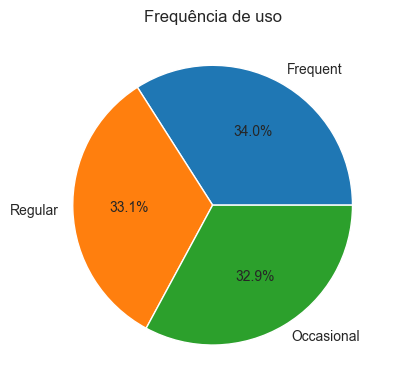

In [17]:
frequencia_uso = df['Usage Frequency'].value_counts()
total = frequencia_uso.sum()
palette = sns.color_palette("deep", len(frequencia_uso))
plt.figure(figsize=(9, 4))
frequencia_uso.plot(kind='pie', color=palette, autopct='%0.1f%%')

plt.title('Frequência de uso')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()

Gêneros Favoritos
Favorite Genres

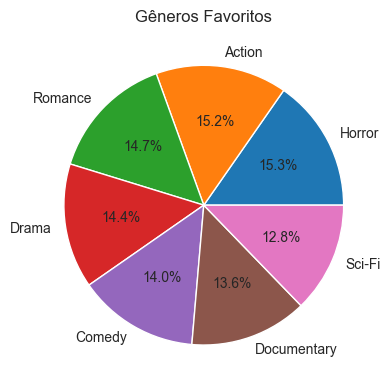

In [18]:
genero_favorito = df['Favorite Genres'].value_counts()
total = genero_favorito.sum()
palette = sns.color_palette("deep", len(genero_favorito))
plt.figure(figsize=(9, 4))
genero_favorito.plot(kind='pie', color=palette, autopct='%0.1f%%')

plt.title('Gêneros Favoritos')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()

Dispositivos utilizados
Devices Used

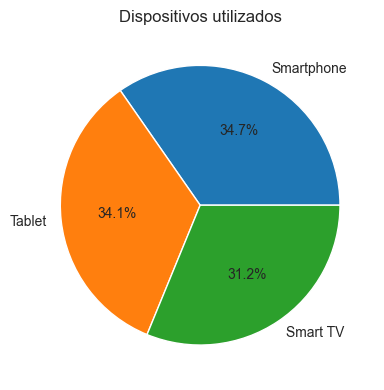

In [19]:
dispositivos_usados = df['Devices Used'].value_counts()
total = dispositivos_usados.sum()
palette = sns.color_palette("deep", len(dispositivos_usados))
plt.figure(figsize=(9, 4))
dispositivos_usados.plot(kind='pie', color=palette, autopct='%0.1f%%')

plt.title('Dispositivos utilizados')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()

Métricas de engajamento
Engagement Metrics

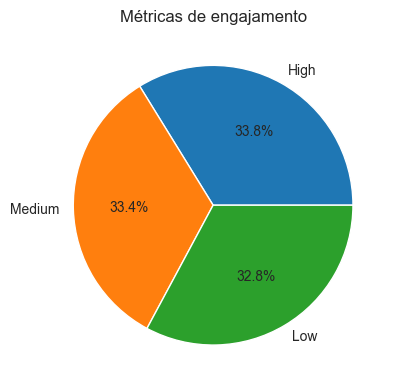

In [20]:
engajamento = df['Engagement Metrics'].value_counts()
total = engajamento.sum()
palette = sns.color_palette("deep", len(engajamento))
plt.figure(figsize=(9, 4))
engajamento.plot(kind='pie', color=palette, autopct='%0.1f%%')

plt.title('Métricas de engajamento')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()

Métrica de engajamento por dispositivo
Engagement metric by device

Convertendo os dispositivos para números inteiros
Converting devices to integers

In [21]:
df['Devices Used'] = df['Devices Used'].replace({'Smart TV':1, 'Smartphone':2, 'Tablet':3})
df['Devices Used'] = df['Devices Used'].astype(int)

C:\Users\rafae\AppData\Local\Temp\ipykernel_3376\403152185.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Devices Used'] = df['Devices Used'].replace({'Smart TV':1, 'Smartphone':2, 'Tablet':3})


Convertendo as métricas para números inteiros
Converting metrics to integers

In [22]:
df['Engagement Metrics'] = df['Engagement Metrics'].replace({'Low':1, 'Medium':2, 'High':3})
df['Engagement Metrics'] = df['Engagement Metrics'].astype(int)

C:\Users\rafae\AppData\Local\Temp\ipykernel_3376\1337701657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Engagement Metrics'] = df['Engagement Metrics'].replace({'Low':1, 'Medium':2, 'High':3})


In [23]:
resultado = df.groupby('Devices Used')['Engagement Metrics'].value_counts().unstack(fill_value=0)

print(resultado)

Engagement Metrics    1    2    3
Devices Used                     
1                   251  263  266
2                   284  286  297
3                   286  285  282


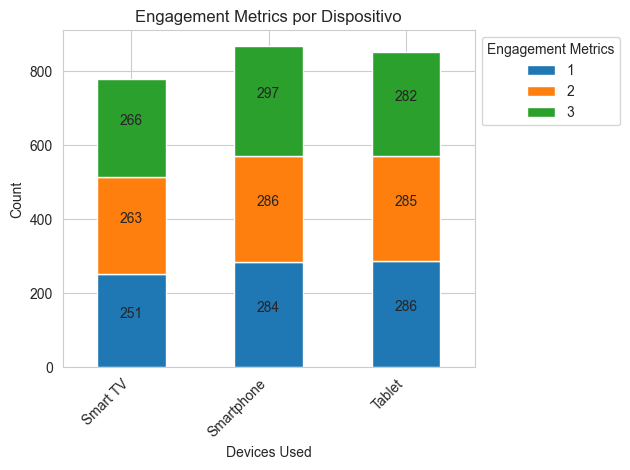

In [46]:
resultado_plot = resultado.copy()

resultado_plot.index = ['Smart TV', 'Smartphone', 'Tablet']

ax = resultado_plot.plot(kind='bar', stacked=True)
plt.xlabel('Devices Used')
plt.ylabel('Count')
plt.title('Engagement Metrics por Dispositivo')

new_labels = {'1': 'Low', '2': 'Medium', '3': 'High'}  
handles, labels = ax.get_legend_handles_labels()
new_labels = {old_label: new_labels.get(old_label, old_label) for old_label in labels}
ax.legend(handles, [new_labels[label] for label in labels], title='Engagement Metrics')

ax.set_xticklabels(resultado_plot.index, rotation=45, ha='right')

plt.legend(title='Engagement Metrics', bbox_to_anchor=(1,1), loc='upper left')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(height), (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Feedback por dispositivo
Feedback by device

Para evitar o excesso de informação no gráfico, utilizei os resultados apenas das notas 3.0, 3.5, 4.0, 4.5, 5.0 (obs: Os resultados das demais notas foram desconsiderados)

To avoid excess information in the graph, I used the results only from grades 3.0, 3.5, 4.0, 4.5, 5.0 (note: The results from other grades were disregarded)

In [25]:
dispositivo_feedback = df.groupby('Devices Used')['Feedback/Ratings'].value_counts().unstack(fill_value=0)

print(dispositivo_feedback)

Feedback/Ratings  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  ...  4.1  \
Devices Used                                                        ...        
1                  23   44   39   32   26   40   40   38   47   42  ...   45   
2                  25   47   40   41   39   51   33   40   48   51  ...   43   
3                  23   52   33   38   40   44   42   34   47   45  ...   43   

Feedback/Ratings  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.0  
Devices Used                                                   
1                  34   46   40   40   34   38   40   39   17  
2                  34   46   39   47   43   45   41   51   21  
3                  48   52   37   42   50   41   41   38   27  

[3 rows x 21 columns]


In [26]:
df['Devices Used'] = df['Devices Used'].replace({1:'Smart TV', 2:'Smartphone', 3:'Tablet'})
df['Devices Used'] = df['Devices Used'].astype(str)

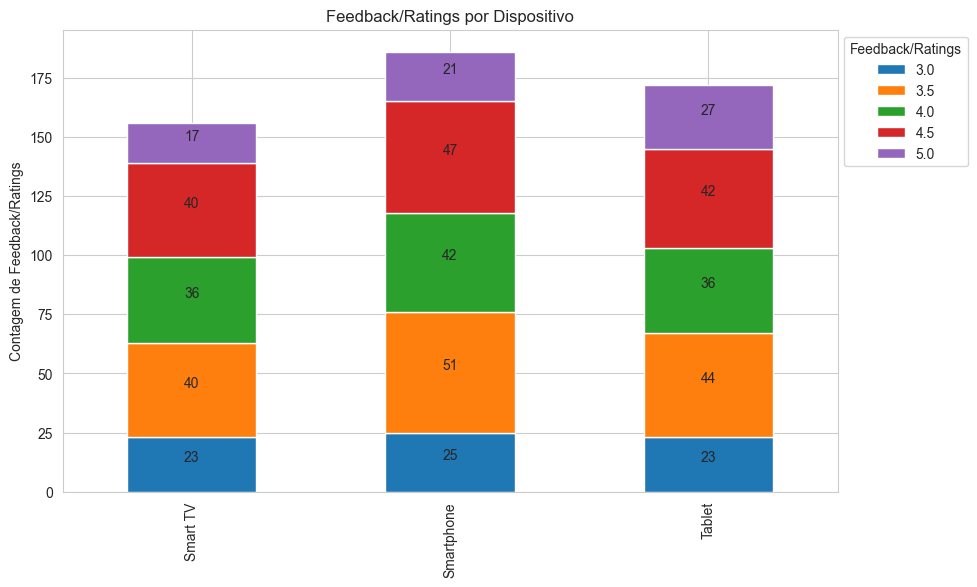

In [47]:
dispositivo_feedback = df.groupby('Devices Used')['Feedback/Ratings'].value_counts().unstack(fill_value=0)

feedback_especifico = [3.0, 3.5, 4.0, 4.5, 5.0]
dispositivo_feedback_filtrado = dispositivo_feedback[feedback_especifico]

ax = dispositivo_feedback_filtrado.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Feedback/Ratings por Dispositivo')
plt.xlabel('')
plt.ylabel('Contagem de Feedback/Ratings')

plt.legend(title='Feedback/Ratings', bbox_to_anchor=(1, 1), loc='upper left')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(height), (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Frequência de uso por dispositivo
Frequency of use by device

In [28]:
df['Usage Frequency'] = df['Usage Frequency'].replace({'Occasional':1, 'Regular':2, 'Frequent':3})
df['Usage Frequency'] = df['Usage Frequency'].astype(int)

C:\Users\rafae\AppData\Local\Temp\ipykernel_3376\2455180847.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Usage Frequency'] = df['Usage Frequency'].replace({'Occasional':1, 'Regular':2, 'Frequent':3})


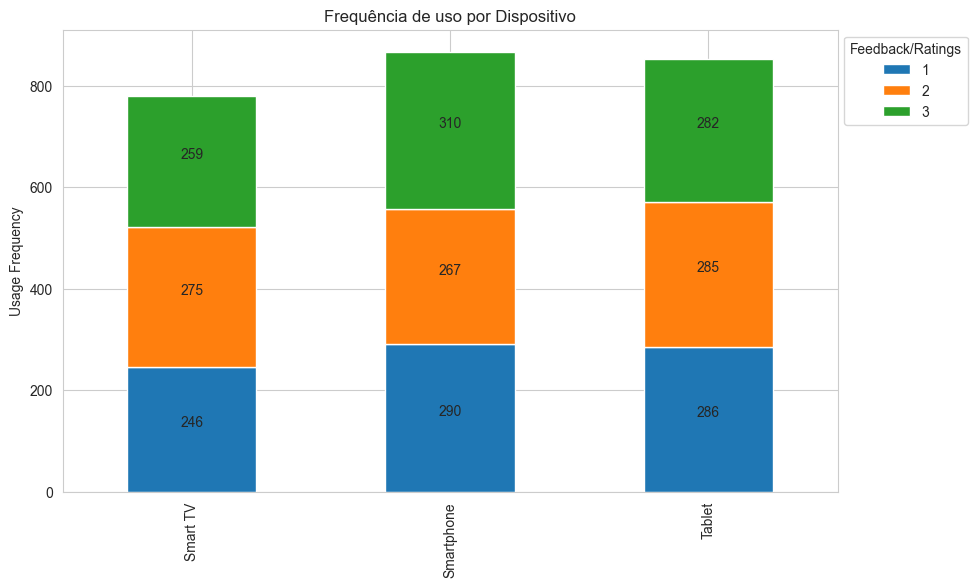

In [48]:
dispositivo_frequencia = df.groupby('Devices Used')['Usage Frequency'].value_counts().unstack(fill_value=0)

ax = dispositivo_frequencia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frequência de uso por Dispositivo')
plt.xlabel('')
plt.ylabel('Usage Frequency')

new_labels = {'1': 'Occasional', '2': 'Regular', '3': 'Frequent'}  
handles, labels = ax.get_legend_handles_labels()
new_labels = {old_label: new_labels.get(old_label, old_label) for old_label in labels}
ax.legend(handles, [new_labels[label] for label in labels], title='Usage Frequency')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(height), (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

# Mover a legenda para fora do gráfico
plt.legend(title='Feedback/Ratings', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Questões:
1 - Qual é a média de idade dos usuários?
2 - Qual é a porcentagem de usuários que optaram por assinaturas mensais versus anuais?
3 - Quais são os gêneros de conteúdo mais populares entre os usuários?
4 - Existe alguma correlação entre a frequência de uso do serviço e o dispositivo utilizado pelo usuário?
5 - Existe alguma correlação entre a métrica de engajamento e o dispositivo utilizado pelo usuário?
6 - Existe alguma correlação entre a feedback e o dispositivo utilizado pelo usuário?
7 - Quais são os dispositivos mais utilizados pelos usuários para acessar o serviço?

Respostas:
1 - A média de idade dos usuários é de 55 anos
2 - Porcentagem de assinaturas anuais: 50.84%
    Porcentagem de assinaturas mensais: 49.16%
3 - O top 3 gêneros mais consumidos em ordem: 1 - Horror, 2 - Ação, 3 - Romance
4 - Sim, o dispositivo com maior frequência de uso é o Smartphone, seguido do Tablet e por ultimo a Smart TV
5 - Sim, o dispositivo com maior métrica de engajamento é o Smartphone
6 - Sim, apesar do dispositivo com maior quantidade de feedback ser o Smartphone, o dispositivo com maior quantidade de feedback nota 5.0 é o Tablet.
7 - Os dispositivos mais usados são: Smartphone em primeiro lugar sendo utilizado por 867 usuários da pesquisa, seguido do Tablet, com 853 usuários e por ultimo a Smart TV com 780 usuários


Considerações Finais:

Neste arquivo CSV, por conter informações de usuários fictícios, todos os dados estão relativamente equilibrados, sem discrepâncias entre as informações das colunas. No entanto, podemos observar que é necessário algum tipo de intervenção no serviço prestado para os usuários de smartphone. Considerando que o smartphone é a plataforma mais utilizada e recebe mais feedbacks, seria natural esperar que recebesse uma quantidade maior de notas 5.0 em comparação com a plataforma Tablet. No entanto, isso não ocorre.

Inglês:

Questions:
1 - What is the average age of users?
2 - What is the percentage of users who opted for monthly versus annual subscriptions?
3 - What are the most popular content genres among users?
4 - Is there any correlation between the frequency of use of the service and the device used by the user?
5 - Is there any correlation between the engagement metric and the device used by the user?
6 - Is there any correlation between feedback and the device used by the user?
7 - What are the devices most used by users to access the service?

Answers:
1 - The average age of users is 55 years old
2 - Percentage of annual subscriptions: 50.84%
    Percentage of monthly subscriptions: 49.16%
3 - The top 3 most consumed genres in order: 1 - Horror, 2 - Action, 3 - Romance
4 - Yes, the device with the highest frequency of use is the Smartphone, followed by the Tablet and finally the Smart TV
5 - Yes, the device with the highest engagement metric is the Smartphone
6 - Yes, although the device with the highest amount of feedback is the Smartphone, the device with the highest amount of feedback rating 5.0 is the Tablet.
7 - The most used devices are: Smartphone in first place being used by 867 survey users, followed by the Tablet, with 853 users and finally the Smart TV with 780 users


Final considerations:

In this CSV file, as it contains information from fictitious users, all data is relatively balanced, with no discrepancies between column information. However, we can see that some type of intervention is needed in the service provided to smartphone users. Considering that the smartphone is the most used platform and receives the most feedback, it would be natural to expect it to receive a greater number of 5.0 ratings compared to the Tablet platform. However, this does not happen.